<a href="https://colab.research.google.com/github/colabdaegu/Machine-Learning/blob/main/team_7_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


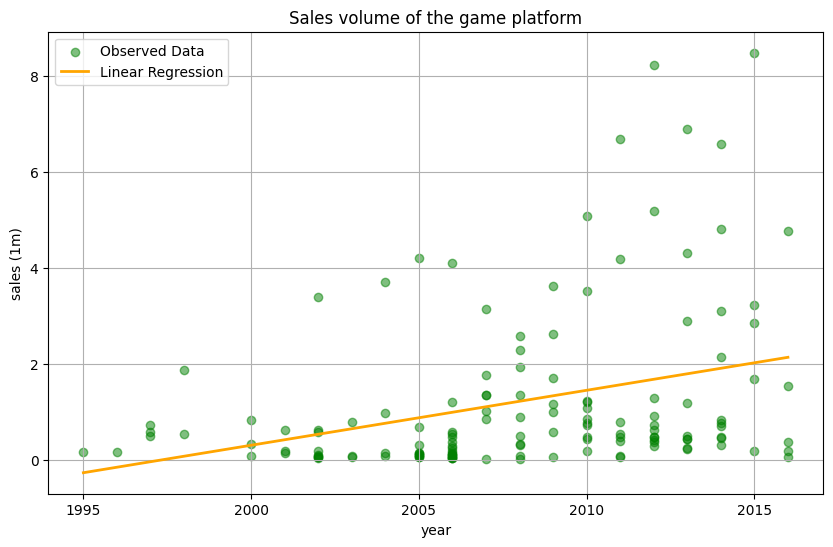

In [ ]:
#선형회귀

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터 로드
liga = pd.read_csv('./drive/MyDrive/vgsales.csv')
liga.info()

# 'Year'와 'Global_Sales' 열에 결측치가 있는 행 제거
cleaned_data = liga.dropna(subset=['Year', 'Global_Sales'])

# --- 예측할 게임 타이틀 지정 ---
platform_data = cleaned_data[cleaned_data['Name'].str.contains('FIFA', case=False, na=False)]
### 발표용 예제 FIFA / Grand Theft Auto / Pokemon
# --- 예측할 게임 타이틀 지정 ---

# 해당 게임 시리즈의 독립 변수(X: 연도)와 종속 변수(y: 글로벌 판매량) 설정
X_platform = platform_data[['Year']].astype(int)  # 연도를 정수형으로 변환
y_platform = platform_data['Global_Sales']

# 해당 게임 플랫폼의 선형 회귀 모델 초기화 및 학습
platform_model = LinearRegression()
platform_model.fit(X_platform, y_platform)

# 시각화를 위한 예측값 생성 (최소 연도부터 최대 연도까지)
years_range_platform = np.arange(X_platform['Year'].min(), X_platform['Year'].max() + 1).reshape(-1, 1)
predicted_sales_platform = platform_model.predict(years_range_platform)

# 데이터와 회귀선을 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_platform, y_platform, color='green', alpha=0.5, label='Observed Data')
plt.plot(years_range_platform, predicted_sales_platform, color='orange', linewidth=2, label='Linear Regression')
plt.title('Sales volume of the game platform')
plt.xlabel('year')
plt.ylabel('sales (1m)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 로지스틱 회귀

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the dataset
vg_data_all = pd.read_csv('./drive/MyDrive/vgsales.csv')

# 학습 성능 향상을 위해 글로벌 판매량이 100만 장 이상인 데이터만 사용
vg_data = vg_data_all[vg_data_all['Global_Sales'] >= 1.0].copy()  # 슬라이스 복사본 생성

# 게임 이름을 카테고리로 변환하는 함수 정의
def categorize_game_name(name):
    if 'Mario' in name: # 이름에 'Mario'가 포함되면 1
        return 1
    elif 'Pokemon' in name: # 이름에 'Pokemon'이 포함되면 2
        return 2
    elif 'Grand Theft Auto' in name:  # 이름에 'Grand Theft Auto'가 포함되면 3
        return 3
    elif 'Call of Duty' in name:  # 이름에 'Call of Duty'가 포함되면 4
        return 4
    elif 'Wii' in name: # 이름에 'Wii'가 포함되면 5
        return 5
    else:
        return 0  # 위 조건에 해당하지 않으면 0

# 플랫폼을 카테고리로 변환하는 함수 정의
def categorize_platform(platform):
    nintendo_platforms = ['GB', 'GBA', 'DS', '3DS', 'Wii', 'WiiU', 'GC', 'NES', 'SNES']
    playstation_platforms = ['PS', 'PS2', 'PS3', 'PS4', 'PS5', 'PSP']
    xbox_platforms = ['XB360', 'XOne', 'XB']

    if platform in nintendo_platforms:
        return 1
    elif platform in playstation_platforms:
        return 2
    elif platform in xbox_platforms:
        return 3
    elif platform == 'PC':
        return 4
    else:
        return 0

# 장르를 카테고리로 변환
# Sports: 1 / Platform: 2 / Racing: 3 / Role-Playing: 4 / Puzzle: 5 / Misc: 6 / Shooter: 7 / Simulation: 8 / Action: 9 / Fighting: 10 / Adventure: 11 / Strategy: 12
genre_mapping = {genre: idx + 1 for idx, genre in enumerate(vg_data['Genre'].unique())}

# 데이터셋에 게임 이름, 플랫폼, 장르 카테고리 추가
vg_data['Game_Category'] = vg_data['Name'].apply(categorize_game_name)
vg_data['Platform_Category'] = vg_data['Platform'].apply(categorize_platform)
vg_data['Genre_Category'] = vg_data['Genre'].map(genre_mapping)

# 글로벌 판매량 기준으로 성공(1), 실패(0) 설정
vg_data['Success'] = (vg_data['Global_Sales'] > 3.0).astype(int)

# 학습용 데이터 준비
features = vg_data[['Game_Category', 'Platform_Category', 'Genre_Category']]
target = vg_data['Success']

# 결측치가 있는 행 제거
vg_data_cleaned = vg_data.dropna(subset=['Game_Category', 'Platform_Category', 'Genre_Category', 'Success'])

# 깨끗한 데이터셋에서 다시 입력 데이터와 타겟 데이터 설정
features = vg_data_cleaned[['Game_Category', 'Platform_Category', 'Genre_Category']]
target = vg_data_cleaned['Success']

# 데이터를 학습 데이터와 테스트 데이터로 분리
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 입력 데이터를 표준화
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(features_train, target_train)

# 모델 성능 평가
print("학습 정확도:", model.score(features_train, target_train))
print("테스트 정확도:", model.score(features_test, target_test))


# --- 예측 섹션 ---
## 예측용 샘플 입력: [Game_Category, Platform_Category, Genre_Category]
# 마리오: 1 / 포켓몬: 2 / Grand Theft Auto: 3 / Call of Duty: 4 / Wii 시리즈: 5 / 그외: 0
# 닌텐도 계열: 1 / Playstation 계열: 2 / Xbox 계열: 3 / PC: 4 / 그외: 0
# Sports: 1 / Platform: 2 / Racing: 3 / Role-Playing: 4 / Puzzle: 5 / Misc: 6 / Shooter: 7 / Simulation: 8 / Action: 9 / Fighting: 10 / Adventure: 11 / Strategy: 12
wiiSeries_game = np.array([5, 1, 1])  # Wii 시리즈 게임, 닌텐도 플랫폼, 스포츠 장르 (-> 발표용 예제 (4, 1, 1))
pokemon_game = np.array([2, 1, 4])  # 포켓몬 게임, 닌텐도 플랫폼, 롤플레잉 장르
gta_game = np.array([3, 2, 9])  # GTA 게임, 플레이스테이션 플랫폼, 액션 장르
# --- 예측 섹션 ---


# 샘플 데이터를 배열로 결합
samples = np.array([wiiSeries_game, pokemon_game, gta_game])
samples = pd.DataFrame(samples, columns=['Game_Category', 'Platform_Category', 'Genre_Category'])  # 열 이름 추가
samples_scaled = scaler.transform(samples)  # 표준화

# 예측 수행
predictions = model.predict(samples_scaled)
probabilities = model.predict_proba(samples_scaled)

# 예측 결과 출력
print("500만 장 이상 판매 (0: 실패, 1: 성공):", predictions)
print("성공 확률 예측:", probabilities)

학습 정확도: 0.7884615384615384
테스트 정확도: 0.7553956834532374
500만 장 이상 판매 (0: 실패, 1: 성공): [1 0 1]
성공 확률 예측: [[0.21969113 0.78030887]
 [0.58222917 0.41777083]
 [0.46701109 0.53298891]]


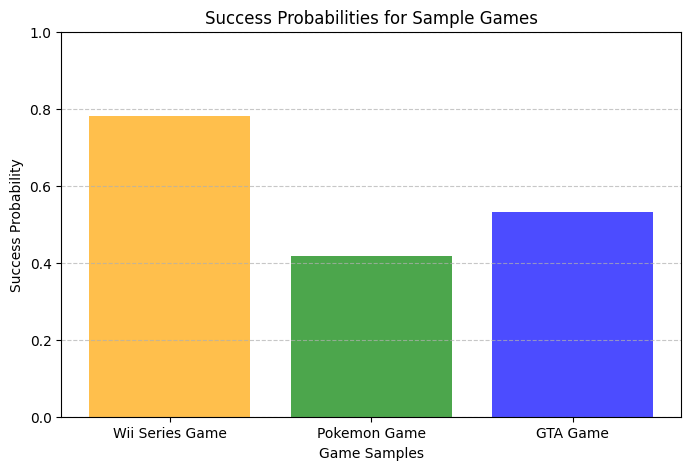

In [ ]:
## 로지스틱 회귀 - 예측 결과 히스토그램
import matplotlib.pyplot as plt

# 샘플 이름 정의
sample_names = ['Wii Series Game', 'Pokemon Game', 'GTA Game']

# 성공 확률 가져오기 (1: 성공에 대한 확률)
success_probabilities = probabilities[:, 1]

# 히스토그램 그리기
plt.figure(figsize=(8, 5))
plt.bar(sample_names, success_probabilities, color=['orange', 'green', 'blue'], alpha=0.7)
plt.title('Success Probabilities for Sample Games')
plt.xlabel('Game Samples')
plt.ylabel('Success Probability')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Training Score: 0.9482699259769324
Testing Score: 0.9475903614457831


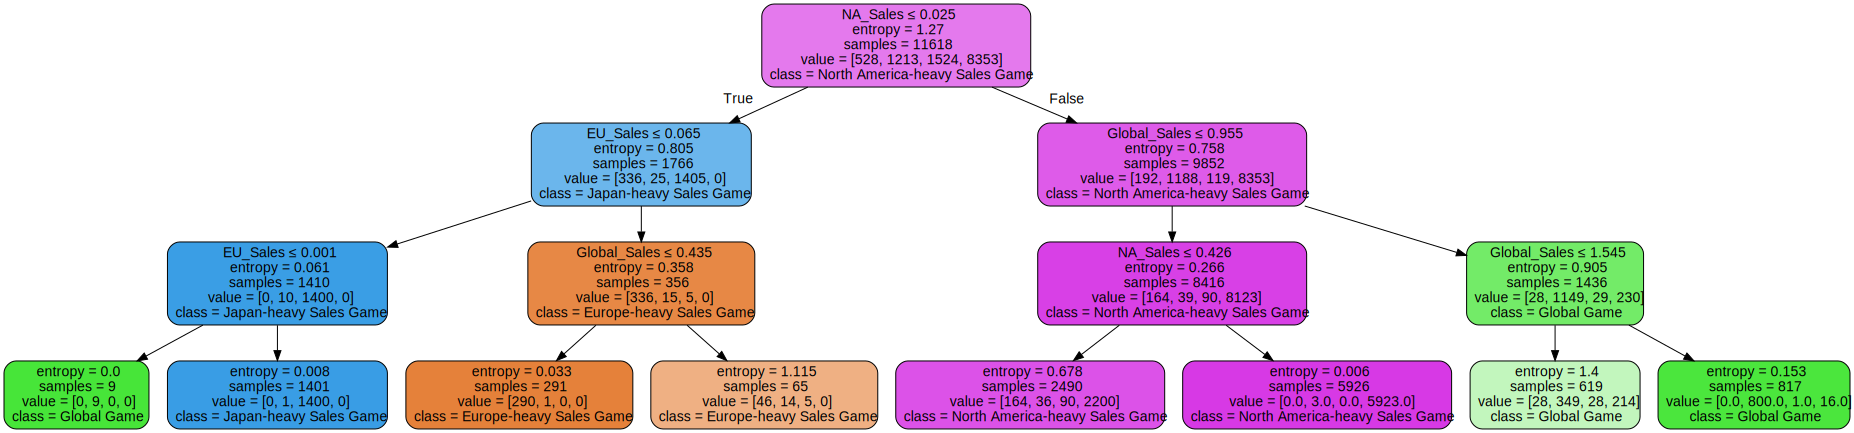

In [ ]:
# 결정트리

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

# 데이터셋 로드
data = pd.read_csv('./drive/MyDrive/vgsales.csv')

# 데이터 개요 확인
data.info()

# NA_Sales, EU_Sales, JP_Sales, Other_Sales 값이 0일 경우 나누기 위해 0.001로 대체
data['NA_Sales'] = data['NA_Sales'].replace(0, 0.001)
data['EU_Sales'] = data['EU_Sales'].replace(0, 0.001)
data['JP_Sales'] = data['JP_Sales'].replace(0, 0.001)
data['Other_Sales'] = data['Other_Sales'].replace(0, 0.001)

# 판매 데이터를 정규화하여 NA_Sales + EU_Sales + JP_Sales + Other_Sales = Global_Sales (1.0)로 만듦
data['NA_Sales'] = data['NA_Sales'] / data['Global_Sales']
data['EU_Sales'] = data['EU_Sales'] / data['Global_Sales']
data['JP_Sales'] = data['JP_Sales'] / data['Global_Sales']
data['Other_Sales'] = data['Other_Sales'] / data['Global_Sales']

# 특징(features)와 타겟(target) 정의
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
feature_data = data[features]

# 타겟 정의: 커스텀 라벨 포함 ('Unpopular Game')
# 각 시장(North America, Europe, Japan)에서 판매량이 글로벌 판매량의 절반 이상인 경우 해당 시장으로 라벨 지정
half_global = data['Global_Sales'] / 2
data['Market_Label'] = np.where(data['NA_Sales'] > half_global, 'North America-heavy Sales Game',
                       np.where(data['EU_Sales'] > half_global, 'Europe-heavy Sales Game',
                       np.where(data['JP_Sales'] > half_global, 'Japan-heavy Sales Game',
                       np.where(data['Other_Sales'] > half_global, 'Global Game', 'Global Game'))))
target = data['Market_Label']

# 데이터셋을 학습용(train)과 테스트용(test)으로 분리
feature_train, feature_test, target_train, target_test = train_test_split(feature_data, target, test_size=0.3, random_state=1)

# 의사결정 트리 분류기 훈련
clf = DecisionTreeClassifier(max_depth=3, random_state=1, criterion='entropy')
clf.fit(feature_train, target_train)

# 학습 및 테스트 정확도 출력
print("Training Score:", clf.score(feature_train, target_train))
print("Testing Score:", clf.score(feature_test, target_test))

# 의사결정 트리 시각화 내보내기
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_data.columns,
                                class_names=clf.classes_,
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# --- 검색할 게임 이름 정의 ---
game_name = "World of Warcraft"
### 발표용 예제 World of Warcraft / God Eater / Wii Fit
# --- 검색할 게임 이름 정의 ---

# 데이터셋에 해당 게임이 존재하는지 확인
game_row = data[data['Name'] == game_name]
if game_row.empty:
    print("게임 데이터 없음")  # 게임 데이터가 없으면 메시지 출력
else:
    # 특징(feature) 값을 리스트로 추출
    game_features = game_row[features].values[0].tolist()

    # 의사결정 트리를 사용하여 클래스 예측
    predicted_class = clf.predict([game_features])[0]

    # 결과 출력
    print(f"게임 이름: {game_name}")
    print(f"게임의 주요 판매 시장: {predicted_class}")

게임 이름: World of Warcraft
게임의 주요 판매 시장: Europe-heavy Sales Game


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
